<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-3.066140,170.711466,173.853515,-3.142049
1,0.0,1.0,78.224365,71.504446,-0.542434,159.186377,159.746777,-0.560400
2,0.0,2.0,82.510208,98.817934,-0.130349,191.197793,191.408514,-0.210721
3,0.0,3.0,32.364824,49.137973,1.736230,93.239027,91.547531,1.691495
4,0.0,4.0,36.782453,61.690156,-0.560123,107.912486,108.541522,-0.629036
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,1.104729,104.449572,103.218133,1.231439
119996,999.0,116.0,27.020199,57.926652,-1.390611,93.556240,94.882140,-1.325901
119997,999.0,117.0,85.618733,77.465554,1.264713,174.349001,173.098321,1.250680
119998,999.0,118.0,70.637414,53.375372,0.325801,134.338587,134.089629,0.248958


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-3.066140,170.711466,173.853515,-3.142049
1,0.0,1.0,78.224365,71.504446,-0.542434,159.186377,159.746777,-0.560400
2,0.0,2.0,82.510208,98.817934,-0.130349,191.197793,191.408514,-0.210721
3,0.0,3.0,32.364824,49.137973,1.736230,93.239027,91.547531,1.691495
4,0.0,4.0,36.782453,61.690156,-0.560123,107.912486,108.541522,-0.629036
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,1.104729,104.449572,103.218133,1.231439
119996,999.0,116.0,27.020199,57.926652,-1.390611,93.556240,94.882140,-1.325901
119997,999.0,117.0,85.618733,77.465554,1.264713,174.349001,173.098321,1.250680
119998,999.0,118.0,70.637414,53.375372,0.325801,134.338587,134.089629,0.248958


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-3.066140,170.711466,173.853515,-3.142049
1,0.0,1.0,78.224365,71.504446,-0.542434,159.186377,159.746777,-0.560400
2,0.0,2.0,82.510208,98.817934,-0.130349,191.197793,191.408514,-0.210721
3,0.0,3.0,32.364824,49.137973,1.736230,93.239027,91.547531,1.691495
4,0.0,4.0,36.782453,61.690156,-0.560123,107.912486,108.541522,-0.629036
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,1.104729,104.449572,103.218133,1.231439
119996,999.0,116.0,27.020199,57.926652,-1.390611,93.556240,94.882140,-1.325901
119997,999.0,117.0,85.618733,77.465554,1.264713,174.349001,173.098321,1.250680
119998,999.0,118.0,70.637414,53.375372,0.325801,134.338587,134.089629,0.248958


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.285598  90.492009 -3.066140  170.711466  173.853515 -3.142049
      1.0    78.224365  71.504446 -0.542434  159.186377  159.746777 -0.560400
      2.0    82.510208  98.817934 -0.130349  191.197793  191.408514 -0.210721
      3.0    32.364824  49.137973  1.736230   93.239027   91.547531  1.691495
      4.0    36.782453  61.690156 -0.560123  107.912486  108.541522 -0.629036
...                ...        ...       ...         ...         ...       ...
999.0 115.0  23.443661  69.901182  1.104729  104.449572  103.218133  1.231439
      116.0  27.020199  57.926652 -1.390611   93.556240   94.882140 -1.325901
      117.0  85.618733  77.465554  1.264713  174.349001  173.098321  1.250680
      118.0  70.637414  53.375372  0.325801  134.338587  134.089629  0.248958
      119.0  68.470341  95.213343 -0.836021  172.847663  173.572747 -0.725084

[120000 rows x 6 columns]

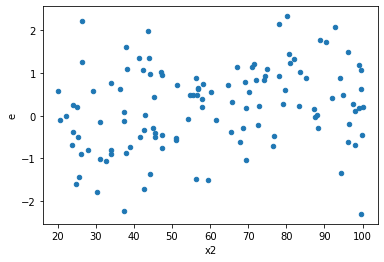

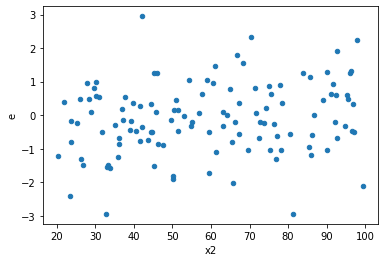

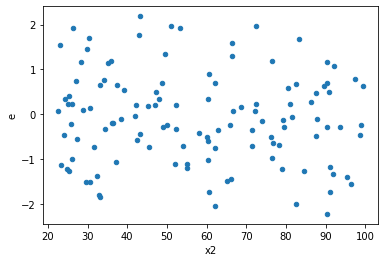

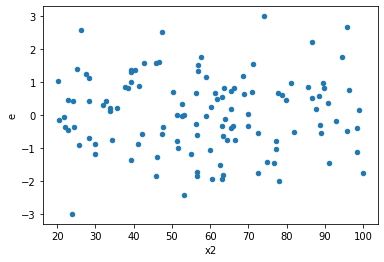

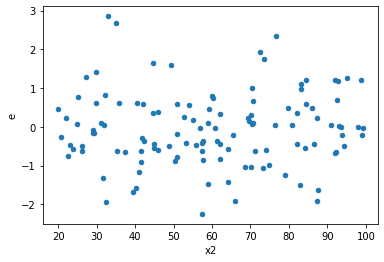

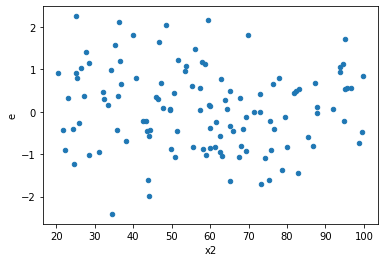

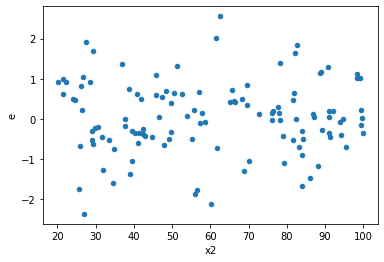

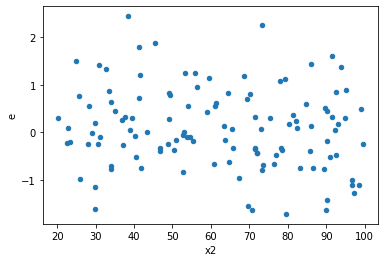

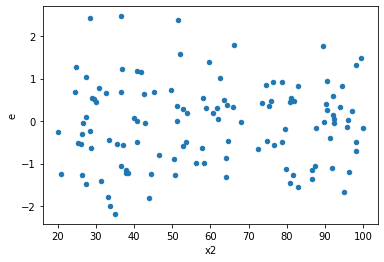

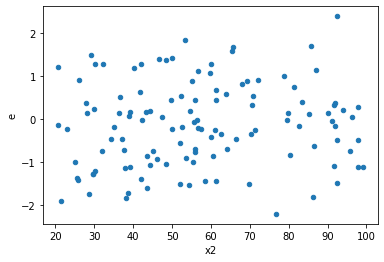

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,44.25138712011196,55.060812819166216,0.961986676524173,1.1969741917210046,1.24427314944307,0.46148724823798815,0.7692563758810059,0.23074362411899407,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,34.61895713980471,50.49673386431575,0.7525860247783632,1.0977550840068642,1.4586439926653612,0.20425513095077852,0.8978724345246107,0.10212756547538926,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,27.528577265254537,36.817476750295384,0.5984473318533595,0.8003799293542475,1.3374275174316734,0.32761880008039546,0.8361905999598023,0.16380940004019773,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,34.11817475219017,56.472747230988226,0.7416994511345689,1.2276684180649615,1.6552100937745222,0.09087039683378872,0.9545648015831056,0.04543519841689436,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,33.88027301416794,39.697352620653035,0.7365276742210422,0.8629859265359355,1.1716951809701335,0.5932407567304363,0.7033796216347818,0.29662037836521815,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,30.243300024104016,41.092589434456926,0.6574630440022612,0.8933171616186288,1.3587336501541165,0.30210229637788544,0.8489488518110573,0.15105114818894272,Reject005=1 : Homoscedasticity
9.0,46.0,46.0,26.083187019898354,52.80185883497455,0.567025804780399,1.1478664964124903,2.024363770987535,0.018531398276077304,0.9907343008619613,0.009265699138038652,Reject005=0 : Heteroscedasticity
11.0,46.0,46.0,37.53791080354417,56.274832741687554,0.816041539207482,1.2233659291671208,1.4991466370146078,0.17350375409662755,0.9132481229516862,0.08675187704831377,Reject005=1 : Homoscedasticity
17.0,46.0,46.0,31.239172211625363,31.961007904153323,0.67911243938316,0.694804519655507,1.0231067484003094,0.9385865366362385,0.5307067316818808,0.46929326831811924,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,44.25138712011196,55.060812819166216,0.961986676524173,1.1969741917210046,1.24427314944307,0.46148724823798815,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,34.61895713980471,50.49673386431575,0.7525860247783632,1.0977550840068642,1.4586439926653612,0.20425513095077852,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,27.528577265254537,36.817476750295384,0.5984473318533595,0.8003799293542475,1.3374275174316734,0.32761880008039546,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,43.785594213611496,36.44591311328945,0.951860743774163,0.7923024589845532,0.8323722394969717,0.5363163403219887,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,34.11817475219017,56.472747230988226,0.7416994511345689,1.2276684180649615,1.6552100937745222,0.09087039683378872,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,55.06088392275851,45.76771160026728,1.196975737451272,0.9949502521797235,0.8312200665806957,0.5332483827704873,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,53.41598737691558,36.49540732384163,1.1612171168894692,0.7933784200835138,0.6832300424650318,0.2002137730681063,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,33.88027301416794,39.697352620653035,0.7365276742210422,0.8629859265359355,1.1716951809701335,0.5932407567304363,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,30.243300024104016,41.092589434456926,0.6574630440022612,0.8933171616186288,1.3587336501541165,0.30210229637788544,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      927
Reject005=0 : Heteroscedasticity     73
Name: Result_test, dtype: int64